In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

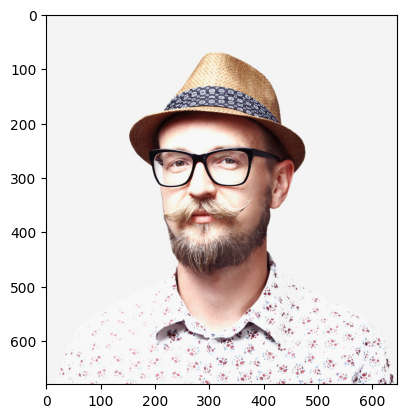

In [13]:
filename = "img1.jpg"
img = read_file(filename)

In [15]:
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    return edges

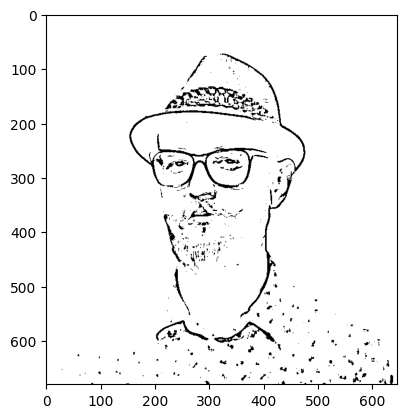

In [16]:
line_size, blur_value = 7, 7
edges = edge_mask(img, line_size, blur_value)
plt.imshow(edges, cmap = 'gray')
plt.show()


In [17]:
def color_palette(img,  k):
    #transform the image
    data = np.float32(img).reshape((1,-3))
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    
    #using kmeans 
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result
    

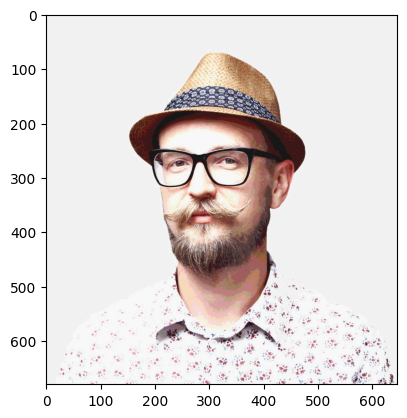

In [18]:
img = color_palette(img,  k=9)
plt.imshow(img)
plt.show()

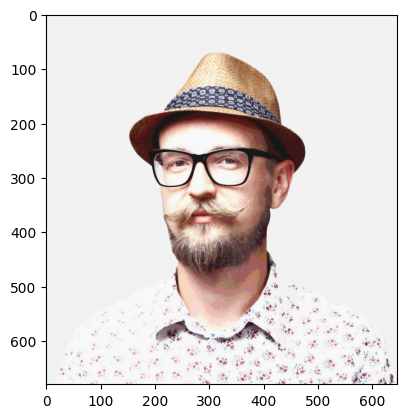

In [19]:
#reduce the noise
blurred  = cv2.bilateralFilter(img, d=3, sigmaColor=200, sigmaSpace=200)
plt.imshow(blurred)
plt.show()

In [20]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask = edges)
    plt.imshow(c)
    plt.show()

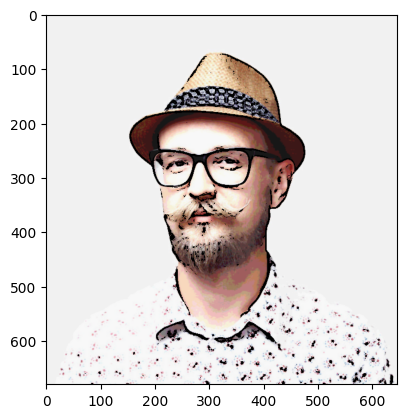

In [21]:
cartoon()

In [ ]:
##streamlit interface
import streamlit as st
st.title("cartoonizer app")
